## Game of Thrones - Dataset & Analysis

By: Renaud Justin Beaupre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import io
import json

In [16]:
got_api = 'https://api.got.show/api/characters/'
r = requests.get(got_api)
x = r.json() #Connecting to an api at api.got.show to collect details on all characters in game of thrones universe

got_api_df = pd.read_json(json.dumps(x)) #Saving api data as got_api_df

In [17]:
got_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 21 columns):
__v            2028 non-null int64
_id            2028 non-null object
actor          9 non-null object
books          2028 non-null object
createdAt      2028 non-null object
culture        718 non-null object
dateOfBirth    478 non-null float64
dateOfDeath    488 non-null float64
father         29 non-null object
hasPath        28 non-null float64
heir           27 non-null object
house          1614 non-null object
imageLink      638 non-null object
male           2028 non-null bool
mother         23 non-null object
name           2028 non-null object
pageRank       1885 non-null float64
slug           2028 non-null object
spouse         279 non-null object
titles         2028 non-null object
updatedAt      2028 non-null object
dtypes: bool(1), float64(4), int64(1), object(15)
memory usage: 318.9+ KB


In [18]:
got_api_df.describe()

,__v,dateOfBirth,dateOfDeath,hasPath,pageRank
count,2028.0,478.000000,488.000000,28.0,1885.000000
mean,0.0,244.012552,262.182377,1.0,24.835013
std,0.0,61.577105,68.538045,0.0,50.295574
min,0.0,-27.000000,-2.000000,1.0,0.000000
25%,0.0,237.000000,265.500000,1.0,3.000000
50%,0.0,267.000000,299.000000,1.0,7.000000
75%,0.0,284.000000,299.000000,1.0,21.000000
max,0.0,300.000000,300.000000,1.0,300.000000


In [19]:
got_api_df.head()

,__v,_id,actor,books,createdAt,culture,dateOfBirth,dateOfDeath,father,hasPath,...,house,imageLink,male,mother,name,pageRank,slug,spouse,titles,updatedAt
0,0,56ffc5be043244081938576d,NaN,[The Hedge Knight],2016-04-02T13:14:38.834Z,NaN,NaN,NaN,NaN,NaN,...,House Hightower,NaN,True,NaN,Abelar Hightower,2.5,Abelar_Hightower,NaN,[Ser],2016-04-02T13:14:38.834Z
1,0,56ffc5be043244081938576e,NaN,[The Mystery Knight],2016-04-02T13:14:38.875Z,NaN,NaN,NaN,NaN,NaN,...,House Frey,NaN,True,NaN,Addam Frey,4.5,Addam_Frey,NaN,[Ser],2016-04-02T13:14:38.875Z
2,0,56ffc5be043244081938576f,NaN,[The Mystery Knight],2016-04-02T13:14:38.877Z,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,Addam,1.5,Addam,NaN,[Ser],2016-04-02T13:14:38.877Z
3,0,56ffc5be0432440819385770,NaN,[The Sworn Sword],2016-04-02T13:14:38.878Z,NaN,183.0,196.0,NaN,NaN,...,House Osgrey,NaN,True,NaN,Addam Osgrey,6.0,Addam_Osgrey,NaN,[],2016-04-02T13:14:38.878Z
4,0,56ffc5be0432440819385771,NaN,"[A Game of Thrones, A Clash of Kings, A Storm ...",2016-04-02T13:14:38.883Z,NaN,NaN,NaN,NaN,NaN,...,House Marbrand,/misc/images/characters/Addam_Marbrand.jpeg,True,NaN,Addam Marbrand,40.0,Addam_Marbrand,NaN,"[Ser, Commander of the City Watch]",2016-04-02T13:14:38.883Z


In [20]:
got_api_df.drop(['__v', '_id', 'createdAt', 'slug', 'imageLink', 'updatedAt'], axis=1, inplace=True) #Dropping columns that don't seem to be even remotely useful

In [21]:
percent_missing = got_api_df.isnull().sum() * 100 / len(got_api_df)
percent_missing #There's a lot of remaining features with a high % of NaNs...

actor          99.556213
books           0.000000
culture        64.595661
dateOfBirth    76.429980
dateOfDeath    75.936884
father         98.570020
hasPath        98.619329
heir           98.668639
house          20.414201
male            0.000000
mother         98.865878
name            0.000000
pageRank        7.051282
spouse         86.242604
titles          0.000000
dtype: float64

In [22]:
got_api_df.head() #As we're ultimately interested in seeing what features help predict surival, we're first going to use 'dateOfBirth' and 'dateOfDeath' to engineer two variables -- one called 'status' and the other 'age'

,actor,books,culture,dateOfBirth,dateOfDeath,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles
0,NaN,[The Hedge Knight],NaN,NaN,NaN,NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser]
1,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser]
2,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser]
3,NaN,[The Sworn Sword],NaN,183.0,196.0,NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[]
4,NaN,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]"


#### We're going to build a function to tell us which characters are still alive. The logic should be as follows:###

    1) If there is a birth date but no death date, assume the character is still alive
    2) If there is a birth date and a death date, assume the character has died
    3) If there is no birth date or death date, mark their status as unknown
    4) If there is no birth date but a death date, assume the character has died

In [23]:
# def add_survival(data):
#     survived = []
#     for i, rows in data.iterrows():
#         if rows['dateOfBirth'] > 0:
#             if rows['dateOfDeath'] > 0:
#                 survived.append('No')
#             else:
#                 survived.append('Yes')
#         else:
#             survived.append('Unknown')

#     return survived

def add_survival(data):
    survived = []
    for i, rows in data.iterrows():
        if rows['dateOfBirth'] > 0:
            if rows['dateOfDeath'] > 0:
                survived.append(0) #0 = No
            else:
                survived.append(1) #1 = Yes
        else:
            if pd.isnull(rows['dateOfBirth']) is True and rows['dateOfDeath'] > 0:
                survived.append(0)
            else: 
                survived.append(None) #if it's unknown, use none (NaN)
            
    return survived

In [24]:
survival = pd.Series(add_survival(got_api_df))
survival.head()

0    NaN
1    NaN
2    NaN
3    0.0
4    NaN
dtype: float64

In [25]:
got_api_df['status'] = survival
got_api_df.head() #Awesome, status appears to be working as intended

,actor,books,culture,dateOfBirth,dateOfDeath,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles,status
0,NaN,[The Hedge Knight],NaN,NaN,NaN,NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser],NaN
1,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser],NaN
2,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser],NaN
3,NaN,[The Sworn Sword],NaN,183.0,196.0,NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[],0.0
4,NaN,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]",NaN


In [26]:
print(got_api_df[got_api_df['status']==1]['status'].count())
print(got_api_df[got_api_df['status']==0]['status'].count())
print(got_api_df['status'].isna().sum())

313
485
1230


#### So we have 313 characters that are still alive, 485 that are dead, and 1230 whose status is unknown... Now we're going to finish cleaning the data and try to tease out some patterns related to the characters' survival

In [27]:
got_api_df['age'] = got_api_df['dateOfDeath'] - got_api_df['dateOfBirth']
got_api_df.head() #now we can drop 'dateOfBirth' and 'dateOfDeath' as we've engineered all the variables we want out of it

,actor,books,culture,dateOfBirth,dateOfDeath,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles,status,age
0,NaN,[The Hedge Knight],NaN,NaN,NaN,NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser],NaN,NaN
1,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser],NaN,NaN
2,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser],NaN,NaN
3,NaN,[The Sworn Sword],NaN,183.0,196.0,NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[],0.0,13.0
4,NaN,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]",NaN,NaN


In [28]:
got_api_df = got_api_df.drop(columns=['dateOfBirth', 'dateOfDeath'])
got_api_df.head()

,actor,books,culture,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles,status,age
0,NaN,[The Hedge Knight],NaN,NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser],NaN,NaN
1,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser],NaN,NaN
2,NaN,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser],NaN,NaN
3,NaN,[The Sworn Sword],NaN,NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[],0.0,13.0
4,NaN,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]",NaN,NaN


C:\Users\Renaud\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


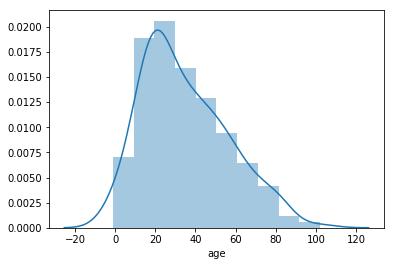

In [29]:
age_explore = got_api_df.dropna(subset=['age'])
sns.distplot(age_explore['age']) #Not that well-distributed as there's a pronounced right-skew... For now, let's just go with the median

In [30]:
got_api_df['age'].fillna(got_api_df['age'].median(), inplace=True)
got_api_df['age'] = got_api_df['age'].astype(int)
got_api_df['age'].isnull().sum() #There, that does it for 'age' so let's move on to the other sketchy features we saw earlier

0

In [31]:
percent_missing = got_api_df.isnull().sum() * 100 / len(got_api_df)
percent_missing #looks like 'actor', 'father', 'hasPath', 'heir', 'mother', 'spouse' could all go, but 'culture' is a tough sell, but I'm keeping it for now. Could be interesting to look at before we drop it later.

actor       99.556213
books        0.000000
culture     64.595661
father      98.570020
hasPath     98.619329
heir        98.668639
house       20.414201
male         0.000000
mother      98.865878
name         0.000000
pageRank     7.051282
spouse      86.242604
titles       0.000000
status      60.650888
age          0.000000
dtype: float64

In [32]:
got_api_df['actor'].unique() #Where the hell is Peter Dinklage? I don't recognize any of these actors o_o

array([nan, 'Patrick Malahide', 'Pilou Asbæk', 'Joel Fry', 'Jack Gleeson',
       'Ciarán Hinds', 'Richard Madden', 'Mark Addy', 'Stephen Dillane',
       '1'], dtype=object)

In [33]:
actor_explore = got_api_df[got_api_df['actor'].notnull()]
actor_explore #I'm not sure what I was hoping to see, but there doesn't seem to be any compelling reason to keep this feature 

,actor,books,culture,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles,status,age
168,Patrick Malahide,[],NaN,Quellon Greyjoy,NaN,Theon Greyjoy,House Greyjoy,True,NaN,Balon Greyjoy,222.0,NaN,[],0.0,30
570,Pilou Asbæk,[],Ironborn,Quellon Greyjoy,NaN,NaN,House Greyjoy,True,Lady of House Sunderly,Euron Greyjoy,222.0,NaN,[],1.0,30
790,Joel Fry,[],Ghiscari,NaN,NaN,NaN,House of Loraq,True,NaN,Hizdahr zo Loraq,134.0,NaN,[],NaN,30
901,Jack Gleeson,[],NaN,Robert Baratheon,1.0,Tommen Baratheon,House Baratheon of King's Landing,True,Cersei Lannister,Joffrey Baratheon,300.0,NaN,[],0.0,14
1133,Ciarán Hinds,[],Free folk,NaN,NaN,NaN,NaN,True,NaN,Mance Rayder,213.0,NaN,[],NaN,30
1546,Richard Madden,[],NaN,Eddard Stark,1.0,Bran Stark,House Stark,True,Catelyn Stark,Robb Stark,300.0,NaN,[],0.0,16
1550,Mark Addy,[],NaN,Steffon Baratheon,1.0,Joffrey Baratheon,House Baratheon of King's Landing,True,Cassana Estermont,Robert Baratheon,300.0,NaN,[],0.0,36
1718,Stephen Dillane,[],NaN,Steffon Baratheon,1.0,Shireen Baratheon,House Baratheon of Dragonstone,True,Cassana Estermont,Stannis Baratheon,300.0,NaN,[],1.0,30
1811,1,[],NaN,Robert Baratheon,1.0,Myrcella Baratheon,NaN,True,Cersei Lannister,Tommen Baratheon,300.0,NaN,[],1.0,30


In [34]:
got_api_df = got_api_df.drop(columns=['actor'])
got_api_df.head()

,books,culture,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles,status,age
0,[The Hedge Knight],NaN,NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser],NaN,30
1,[The Mystery Knight],NaN,NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser],NaN,30
2,[The Mystery Knight],NaN,NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser],NaN,30
3,[The Sworn Sword],NaN,NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[],0.0,13
4,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]",NaN,30


In [35]:
got_api_df['hasPath'].unique() #It seems like this feature refers to a hasPath function but I very little idea what they're used for...

array([nan,  1.])

In [36]:
path_explore = got_api_df[got_api_df['hasPath'].notnull()]
path_explore

,books,culture,father,hasPath,heir,house,male,mother,name,pageRank,spouse,titles,status,age
146,"[A Game of Thrones, A Clash of Kings, A Feast ...",Ironborn,NaN,1.0,NaN,House Greyjoy,False,NaN,Asha Greyjoy,213.0,Erik Ironmaker,"[Princess, Captain of the Black Wind, Conquero...",1.0,30
149,"[A Game of Thrones, A Clash of Kings, A Storm ...",Northmen,NaN,1.0,NaN,House Stark,False,NaN,Arya Stark,300.0,NaN,[Princess],1.0,30
263,"[A Game of Thrones, A Clash of Kings, A Storm ...",Northmen,NaN,1.0,NaN,House Stark,True,NaN,Bran Stark,300.0,NaN,[Prince of Winterfell],1.0,30
276,"[A Clash of Kings, A Storm of Swords, A Feast ...",NaN,NaN,1.0,NaN,House Tarth,False,NaN,Brienne of Tarth,278.0,NaN,[],1.0,30
315,"[A Game of Thrones, A Clash of Kings, A Storm ...",Rivermen,NaN,1.0,NaN,House Tully,False,NaN,Catelyn Stark,0.0,Eddard Stark,[Lady of Winterfell],0.0,35
326,"[A Game of Thrones, A Clash of Kings, A Storm ...",Westerlands,NaN,1.0,NaN,House Lannister,False,NaN,Cersei Lannister,300.0,Robert Baratheon,"[Light of the West, Queen Dowager, Protector o...",1.0,30
387,"[A Game of Thrones, A Clash of Kings, A Storm ...",Valyrian,NaN,1.0,NaN,House Targaryen,False,NaN,Daenerys Targaryen,300.0,Drogo,[Queen of the Andals and the Rhoynar and the F...,1.0,30
426,"[A Clash of Kings, A Storm of Swords, A Feast ...",Westeros,NaN,1.0,NaN,House Seaworth,True,NaN,Davos Seaworth,291.0,Marya Seaworth,"[Ser, Lord of the Rainwood, Admiral of the Nar...",1.0,30
482,"[A Game of Thrones, A Clash of Kings, A Storm ...",Dothraki,NaN,1.0,NaN,NaN,True,NaN,Drogo,168.0,Daenerys Targaryen,[Khal],0.0,32
507,"[The World of Ice and Fire, A Game of Thrones,...",Northmen,NaN,1.0,NaN,House Stark,True,NaN,Eddard Stark,300.0,Catelyn Tully,"[Lord of Winterfell, Warden of the North, Hand...",0.0,36


In [37]:
path_explore['status'].value_counts() #It seems to be a feature that affects a lot of central characters and that plays some sort of role for predicting 'status' but I'm still getting rid of it for now due to its high % of NaNs

1.0    19
0.0     9
Name: status, dtype: int64

In [38]:
got_api_df = got_api_df.drop(columns=['hasPath'])
got_api_df.head()

,books,culture,father,heir,house,male,mother,name,pageRank,spouse,titles,status,age
0,[The Hedge Knight],NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser],NaN,30
1,[The Mystery Knight],NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser],NaN,30
2,[The Mystery Knight],NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser],NaN,30
3,[The Sworn Sword],NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[],0.0,13
4,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]",NaN,30


In [39]:
family = got_api_df[['father','mother','heir','spouse']]

family_explore = family[family.notnull().any(axis=1)]
family_explore #Still only represents 313 rows amongst 2028 (15%) but it seems like this field could be useful if we engineered a new column called 'family' or 'relatives' and looked at the distribution of 'status' amongst this subset

,father,mother,heir,spouse
10,Aerion Targaryen,Valaena Velaryon,Aenys Targaryen,NaN
11,Viserys I Targaryen,Alicent Hightower,Jaehaerys Targaryen,NaN
12,NaN,NaN,Daeron II Targaryen,NaN
13,Maekar I Targaryen,Dyanna Dayne,Duncan Targaryen,NaN
14,Daemon Targaryen,Rhaenyra Targaryen,Daeron I Targaryen,NaN
16,NaN,NaN,NaN,Rhaena Targaryen
19,NaN,NaN,NaN,Calla Blackfyre
22,NaN,NaN,NaN,Viserys I Targaryen
23,NaN,NaN,NaN,Aerys I Targaryen
26,NaN,NaN,NaN,Tyana Wylde


In [40]:
got_api_df['relatives'] = family.count(axis=1)
got_api_df.head() #Sick! Now we can drop those features

,books,culture,father,heir,house,male,mother,name,pageRank,spouse,titles,status,age,relatives
0,[The Hedge Knight],NaN,NaN,NaN,House Hightower,True,NaN,Abelar Hightower,2.5,NaN,[Ser],NaN,30,0
1,[The Mystery Knight],NaN,NaN,NaN,House Frey,True,NaN,Addam Frey,4.5,NaN,[Ser],NaN,30,0
2,[The Mystery Knight],NaN,NaN,NaN,NaN,True,NaN,Addam,1.5,NaN,[Ser],NaN,30,0
3,[The Sworn Sword],NaN,NaN,NaN,House Osgrey,True,NaN,Addam Osgrey,6.0,NaN,[],0.0,13,0
4,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,NaN,NaN,House Marbrand,True,NaN,Addam Marbrand,40.0,NaN,"[Ser, Commander of the City Watch]",NaN,30,0


In [41]:
got_api_df = got_api_df.drop(columns=['father', 'heir', 'mother', 'spouse'])
got_api_df.head() #However, I just realized in the previous cell that [] doesn't seem to count as a NaN, ergo the features 'books' and 'titles' might have inflated non-missing values...

,books,culture,house,male,name,pageRank,titles,status,age,relatives
0,[The Hedge Knight],NaN,House Hightower,True,Abelar Hightower,2.5,[Ser],NaN,30,0
1,[The Mystery Knight],NaN,House Frey,True,Addam Frey,4.5,[Ser],NaN,30,0
2,[The Mystery Knight],NaN,NaN,True,Addam,1.5,[Ser],NaN,30,0
3,[The Sworn Sword],NaN,House Osgrey,True,Addam Osgrey,6.0,[],0.0,13,0
4,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,House Marbrand,True,Addam Marbrand,40.0,"[Ser, Commander of the City Watch]",NaN,30,0


In [42]:
got_api_df['books'].apply(pd.Series).stack().value_counts() #Pretty diverse... And looking at the cell above, it seems like each list can have multiple items

A Feast for Crows                            1216
A Storm of Swords                             995
A Dance with Dragons                          840
A Clash of Kings                              754
A Game of Thrones                             400
The World of Ice and Fire                     165
The Sworn Sword                                75
The Mystery Knight                             64
The Hedge Knight                               47
The Rogue Prince                               44
The Princess and the Queen                     44
The Winds of Winter                            42
                                                6
The Princess and The Queen                      2
A Dance with Dragons  The Winds of Winter       1
A World of Ice and Fire                         1
A Feast For Crows                               1
A Clash of Kings (mentioned                     1
A Storm of Swords (Mentioned                    1
dtype: int64

In [43]:
got_api_df['bookMentions'] = got_api_df['books'].str.len()
got_api_df.head() #We're just going to engineer a new variable called 'bookMentions' instead of keeping this list series...

,books,culture,house,male,name,pageRank,titles,status,age,relatives,bookMentions
0,[The Hedge Knight],NaN,House Hightower,True,Abelar Hightower,2.5,[Ser],NaN,30,0,1
1,[The Mystery Knight],NaN,House Frey,True,Addam Frey,4.5,[Ser],NaN,30,0,1
2,[The Mystery Knight],NaN,NaN,True,Addam,1.5,[Ser],NaN,30,0,1
3,[The Sworn Sword],NaN,House Osgrey,True,Addam Osgrey,6.0,[],0.0,13,0,1
4,"[A Game of Thrones, A Clash of Kings, A Storm ...",NaN,House Marbrand,True,Addam Marbrand,40.0,"[Ser, Commander of the City Watch]",NaN,30,0,5


In [44]:
got_api_df = got_api_df.drop(columns=['books'])
got_api_df.head() #looks good, now let's look at 'titles'

,culture,house,male,name,pageRank,titles,status,age,relatives,bookMentions
0,NaN,House Hightower,True,Abelar Hightower,2.5,[Ser],NaN,30,0,1
1,NaN,House Frey,True,Addam Frey,4.5,[Ser],NaN,30,0,1
2,NaN,NaN,True,Addam,1.5,[Ser],NaN,30,0,1
3,NaN,House Osgrey,True,Addam Osgrey,6.0,[],0.0,13,0,1
4,NaN,House Marbrand,True,Addam Marbrand,40.0,"[Ser, Commander of the City Watch]",NaN,30,0,5


In [45]:
got_api_df['titles'].apply(pd.Series).stack().value_counts() #Again, pretty diverse. Let's see if we can engineer a new feature around the rarity of the titles

Ser                                          397
Maester                                       42
Lord                                          26
Hand of the King                              25
Princess                                      24
Archmaester                                   22
Lord of Winterfell                            21
Septon                                        18
Prince                                        17
Lady                                          15
Queen                                         13
Warden of the North                           13
Lord Commander of the Night&apos;s Watch      12
Septa                                         11
Cupbearer                                     10
Grand Maester                                  9
Khal                                           9
Lord Commander of the Kingsguard               9
King in the North                              9
Warden of the West                             7
Wisdom              

In [46]:
titles = got_api_df['titles']

newTitles = []

for i in titles:
    if i == ['Ser']:
        newTitles.append('Common') 
    elif i == []:
        newTitles.append('Unknown')
    else:
        newTitles.append('Rare')

#print(titles)
#print(newTitles)

In [47]:
got_api_df['newTitles'] = newTitles

In [48]:
got_api_df.head() #To be honest, I know this isn't the best way to treat this feature but I couldn't figure how to use apply(pd.Series) on 'titles' to grab more than just the first element so I went this route instead...

,culture,house,male,name,pageRank,titles,status,age,relatives,bookMentions,newTitles
0,NaN,House Hightower,True,Abelar Hightower,2.5,[Ser],NaN,30,0,1,Common
1,NaN,House Frey,True,Addam Frey,4.5,[Ser],NaN,30,0,1,Common
2,NaN,NaN,True,Addam,1.5,[Ser],NaN,30,0,1,Common
3,NaN,House Osgrey,True,Addam Osgrey,6.0,[],0.0,13,0,1,Unknown
4,NaN,House Marbrand,True,Addam Marbrand,40.0,"[Ser, Commander of the City Watch]",NaN,30,0,5,Rare


In [49]:
got_api_df = got_api_df.drop(columns=['titles','name'])
got_api_df.head() #Sweet, now we can wrap up by converting 'male' into the column 'gender' with binary values

,culture,house,male,pageRank,status,age,relatives,bookMentions,newTitles
0,NaN,House Hightower,True,2.5,NaN,30,0,1,Common
1,NaN,House Frey,True,4.5,NaN,30,0,1,Common
2,NaN,NaN,True,1.5,NaN,30,0,1,Common
3,NaN,House Osgrey,True,6.0,0.0,13,0,1,Unknown
4,NaN,House Marbrand,True,40.0,NaN,30,0,5,Rare


In [50]:
got_api_df['gender'] = got_api_df['male'].astype(int)
got_api_df = got_api_df.drop(columns=['male'])
got_api_df.head() #Doooope

,culture,house,pageRank,status,age,relatives,bookMentions,newTitles,gender
0,NaN,House Hightower,2.5,NaN,30,0,1,Common,1
1,NaN,House Frey,4.5,NaN,30,0,1,Common,1
2,NaN,NaN,1.5,NaN,30,0,1,Common,1
3,NaN,House Osgrey,6.0,0.0,13,0,1,Unknown,1
4,NaN,House Marbrand,40.0,NaN,30,0,5,Rare,1


In [51]:
got_api_df['culture'].fillna('Unknown', inplace=True)
got_api_df['house'].fillna('Unknown', inplace=True)
got_api_df.head() #Wooo, now I think we're ready for some analysis

,culture,house,pageRank,status,age,relatives,bookMentions,newTitles,gender
0,Unknown,House Hightower,2.5,NaN,30,0,1,Common,1
1,Unknown,House Frey,4.5,NaN,30,0,1,Common,1
2,Unknown,Unknown,1.5,NaN,30,0,1,Common,1
3,Unknown,House Osgrey,6.0,0.0,13,0,1,Unknown,1
4,Unknown,House Marbrand,40.0,NaN,30,0,5,Rare,1


In [52]:
got_grouped = got_api_df.groupby('status')
got_grouped.mean()

,pageRank,age,relatives,bookMentions,gender
status,,,,,
0.0,40.126386,31.612371,0.286598,2.579381,0.853608
1.0,52.094502,30.000000,0.249201,3.303514,0.568690


In [53]:
got_grouped.median()

,pageRank,age,relatives,bookMentions,gender
status,,,,,
0.0,13.5,30,0,2,1
1.0,18.0,30,0,3,1


In [54]:
got_grouped.var()

,pageRank,age,relatives,bookMentions,gender
status,,,,,
0.0,3824.371769,156.068442,0.428022,2.587177,0.125219
1.0,6147.648797,0.000000,0.232571,2.109507,0.246068


In [55]:
got_grouped.std() #Quick cross-reference between these stat sets seems to indicate that the survivors tend to be more female, have a higher pageRank, and more book mentions (which probably correlates with pageRank) we need to confirm the other features (both categorical and numerical) by looking into them more closely...

,pageRank,age,relatives,bookMentions,gender
status,,,,,
0.0,61.841505,12.492736,0.654234,1.608470,0.353864
1.0,78.406944,0.000000,0.482257,1.452414,0.496052


In [56]:
got_api_df['culture'].unique()

array(['Unknown', 'Valyrian', 'Stormlands', 'Ironmen', 'Dothraki',
       'Ironborn', 'Northmen', 'Tyroshi', 'Free Folk', 'Braavosi',
       'Valemen', 'Dornish', 'Reach', 'Norvos', 'Dornishmen', 'Andal',
       'Ibbenese', 'Ghiscari', 'Asshai', 'Free folk', 'Stormlander',
       'Westeros', 'Meereenese', 'Summer Islander',
       'Northern mountain clans', 'First Men', 'Rivermen', 'Norvoshi',
       'Myrish', 'Summer Isles', 'Vale mountain clans', 'Westerlands',
       'Astapori', 'Westerman', 'Lysene', 'Crownlands', 'Qartheen',
       'Lhazareen', 'Rhoynar', 'Westermen', 'Dorne', 'Sistermen', 'Ghis',
       'Pentoshi', 'Wildlings', 'northmen', 'Crannogmen', 'Andals',
       'Summer Islands', 'Riverlands', 'Vale', 'Lyseni', 'Astapor',
       'ironborn', 'Wildling', 'westermen', 'Ghiscaricari', 'Naathi',
       'Braavos', 'Myrmen', 'Reachmen', 'Meereen', "Asshai'i",
       'free folk', 'Lhazarene', 'Qarth', 'Myr', 'Qohor', 'Qohori'],
      dtype=object)

In [57]:
got_api_df['culture'].value_counts()

Unknown                    1310
Northmen                    126
Ironborn                    116
Free Folk                    57
Valyrian                     46
Braavosi                     44
Ghiscari                     34
Dornish                      27
Dothraki                     23
Valemen                      19
Rivermen                     19
Reach                        17
Vale mountain clans          15
Dornishmen                   14
Free folk                    13
Westeros                     12
Westerman                     9
northmen                      9
Stormlands                    8
Tyroshi                       7
Qartheen                      6
Northern mountain clans       5
Summer Isles                  5
Ironmen                       5
Astapori                      4
Crannogmen                    4
Lysene                        4
Westermen                     4
First Men                     4
Pentoshi                      3
                           ... 
Rhoynar 

In [58]:
from collections import Counter
Culture_List = [i for i, j in Counter(got_api_df['culture']).most_common(21)]
Culture_List.remove('Unknown')
print (Culture_List) #We're probably not interested in grabbing everything so let's just aim for the top 20 cultures (sans 'Unknown')... That should give us more than enough room to work with

['Northmen', 'Ironborn', 'Free Folk', 'Valyrian', 'Braavosi', 'Ghiscari', 'Dornish', 'Dothraki', 'Valemen', 'Rivermen', 'Reach', 'Vale mountain clans', 'Dornishmen', 'Free folk', 'Westeros', 'Westerman', 'northmen', 'Stormlands', 'Tyroshi', 'Qartheen']


In [59]:
got_culture_status = got_api_df[['culture', 'status']].copy()
got_culture_status['counter'] = 1
got_culture_status.head()

,culture,status,counter
0,Unknown,NaN,1
1,Unknown,NaN,1
2,Unknown,NaN,1
3,Unknown,0.0,1
4,Unknown,NaN,1


In [60]:
got_culture_status[got_culture_status['culture'].isin(Culture_List)].pivot_table(index='culture', columns='status', aggfunc=sum) #Seems like the NaNs between 'culture' and 'status' trimmed things down, but there's some interesting inisghts around 'Northmen', 'Ironborn', 'Valyrian' and 'Free Folk' although it looks like there's some duplication of culture values...

counter      
status                  0.0   1.0
culture                          
Braavosi                2.0   2.0
Dornish                 4.0   7.0
Dornishmen              3.0   7.0
Dothraki                8.0   3.0
Free Folk              19.0   2.0
Free folk               1.0   NaN
Ghiscari                6.0   1.0
Ironborn               13.0   9.0
Northmen               33.0  28.0
Qartheen                1.0   NaN
Reach                   4.0   3.0
Rivermen                5.0   6.0
Stormlands              2.0   2.0
Tyroshi                 2.0   NaN
Vale mountain clans     2.0   1.0
Valemen                 6.0   3.0
Valyrian               33.0   9.0
Westerman               6.0   1.0
Westeros                4.0   6.0
northmen                4.0   NaN

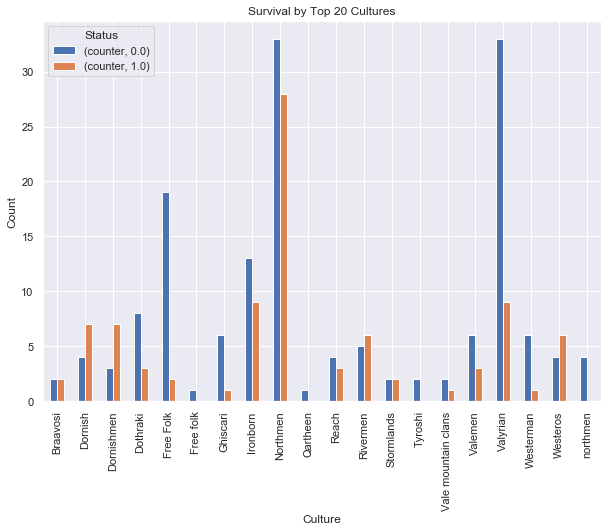

In [61]:
sns.set()
got_culture_status[got_culture_status['culture'].isin(Culture_List)].pivot_table(index='culture', columns='status', aggfunc=sum).plot(kind='bar', figsize=(10,7))
plt.title('Survival by Top 20 Cultures')
plt.xlabel('Culture')
plt.ylabel('Count')
plt.legend(title='Status')

In [62]:
got_api_df = got_api_df.drop(columns=['culture']) #However, since I'm hoping to run some correlations later on we'll need to get rid of 'culture' at this time
got_api_df.head()

,house,pageRank,status,age,relatives,bookMentions,newTitles,gender
0,House Hightower,2.5,NaN,30,0,1,Common,1
1,House Frey,4.5,NaN,30,0,1,Common,1
2,Unknown,1.5,NaN,30,0,1,Common,1
3,House Osgrey,6.0,0.0,13,0,1,Unknown,1
4,House Marbrand,40.0,NaN,30,0,5,Rare,1


In [63]:
got_api_df['house'].unique()

array(['House Hightower', 'House Frey', 'Unknown', 'House Osgrey',
       'House Marbrand', 'House Swyft', 'House Blackfyre',
       'House Velaryon', 'House Targaryen', 'House Bracken',
       'House Costayne', 'House Estermont', 'House Arryn',
       'House Penrose', "Night's Watch", 'House Greyjoy',
       'Faith of the Seven', 'House Wynch', "Chataya's brothel",
       'House Royce of the Gates of the Moon', 'House Stark',
       'Band of Nine', 'House Staedmon', 'House Torrent', 'House Florent',
       'House Oakheart', 'House Norcross', "City Watch of King's Landing",
       'House Thorne', 'House Seaworth', 'House Dayne', 'House Tyrell',
       'House Sharp', 'House Graceford', 'House Connington',
       'House Ambrose', 'House Cockshaw', 'House Hunt', 'House Haigh',
       'House Stackspear', 'House Karstark', 'House Mormont',
       'House Bulwer', 'House Lefford', 'House Tarth', 'House Whent',
       'House Blackwood', 'House Crakehall', 'House Butterwell',
       'House Lorc

In [64]:
got_api_df['house'].value_counts()

Unknown                           414
Night's Watch                     110
House Frey                         97
House Stark                        81
House Targaryen                    80
House Lannister                    53
House Greyjoy                      43
House Tyrell                       36
House Martell                      31
House Osgrey                       21
House Arryn                        17
Faith of the Seven                 17
House Hightower                    16
House Bracken                      14
House Botley                       13
House Florent                      13
House Baratheon of Dragonstone     13
House Bolton                       13
House of Loraq                     13
House Baratheon                    13
Brotherhood without banners        13
House Tully                        12
Brave Companions                   12
House Velaryon                     11
House Crakehall                    11
House Whent                        11
House Clegan

In [65]:
from collections import Counter
House_List = [i for i, j in Counter(got_api_df['house']).most_common(21)]
House_List.remove('Unknown')
print (House_List) #Same thing again, we'll just take the top 20 most common houses

["Night's Watch", 'House Frey', 'House Stark', 'House Targaryen', 'House Lannister', 'House Greyjoy', 'House Tyrell', 'House Martell', 'House Osgrey', 'House Arryn', 'Faith of the Seven', 'House Hightower', 'House Bracken', 'House Florent', 'Brotherhood without banners', 'House Botley', 'House Baratheon', 'House of Loraq', 'House Bolton', 'House Baratheon of Dragonstone']


In [66]:
got_house_status = got_api_df[['house', 'status']].copy()
got_house_status['counter'] = 1
got_house_status.head()

,house,status,counter
0,House Hightower,NaN,1
1,House Frey,NaN,1
2,Unknown,NaN,1
3,House Osgrey,0.0,1
4,House Marbrand,NaN,1


In [67]:
got_house_status[got_house_status['house'].isin(House_List)].pivot_table(index='house', columns='status', aggfunc=sum) #Seems like the relative odds of survival were bad for msot houses except for House Frey... Most likely 1) because Lord Walder Frey couldn't pull out and 2) his family doesn't get massacred in the books by Arya 

counter      
status                             0.0   1.0
house                                       
Brotherhood without banners        1.0   1.0
Faith of the Seven                 2.0   3.0
House Arryn                        5.0   2.0
House Baratheon                    6.0   1.0
House Baratheon of Dragonstone     2.0   3.0
House Bolton                       4.0   1.0
House Botley                       2.0   1.0
House Bracken                      6.0   1.0
House Florent                      2.0   NaN
House Frey                        14.0  69.0
House Greyjoy                     15.0   6.0
House Hightower                    4.0   3.0
House Lannister                   19.0  11.0
House Martell                      5.0  11.0
House Osgrey                       3.0   2.0
House Stark                       23.0   7.0
House Targaryen                   48.0  16.0
House Tyrell                       2.0   7.0
House of Loraq                     2.0   NaN
Night's Watch                     49.0   8.0

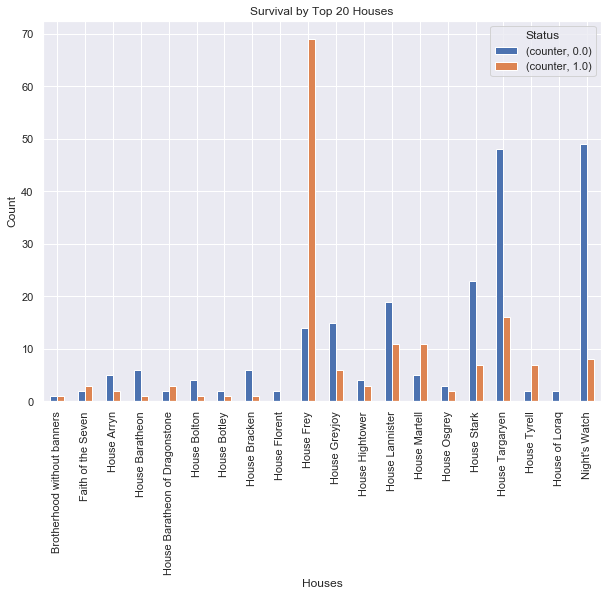

In [68]:
sns.set()
got_house_status[got_house_status['house'].isin(House_List)].pivot_table(index='house', columns='status', aggfunc=sum).plot(kind='bar', figsize=(10,7))
plt.title('Survival by Top 20 Houses')
plt.xlabel('Houses')
plt.ylabel('Count')
plt.legend(title='Status')

In [69]:
got_api_df = got_api_df.drop(columns=['house']) #Same thing, different column
got_api_df.head()

,pageRank,status,age,relatives,bookMentions,newTitles,gender
0,2.5,NaN,30,0,1,Common,1
1,4.5,NaN,30,0,1,Common,1
2,1.5,NaN,30,0,1,Common,1
3,6.0,0.0,13,0,1,Unknown,1
4,40.0,NaN,30,0,5,Rare,1


In [70]:
got_nt_status = got_api_df[['newTitles', 'status']].copy()
got_nt_status['counter'] = 1
got_nt_status.head()

,newTitles,status,counter
0,Common,NaN,1
1,Common,NaN,1
2,Common,NaN,1
3,Unknown,0.0,1
4,Rare,NaN,1


In [71]:
got_nt_status.pivot_table(index='newTitles', columns='status', aggfunc=sum)

counter     
status        0.0  1.0
newTitles             
Common         71   29
Rare          173  108
Unknown       241  176

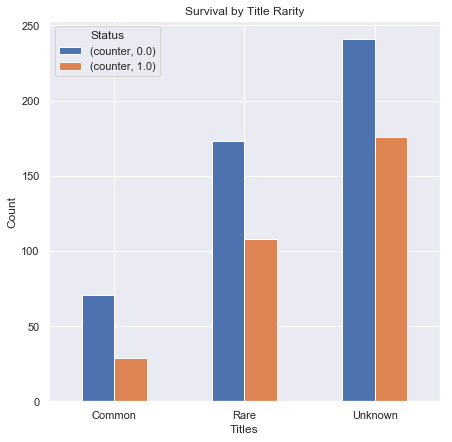

In [72]:
sns.set()
got_nt_status.pivot_table(index='newTitles', columns='status', aggfunc=sum).plot(kind='bar', figsize=(7,7)) #Seems like if you had a rare title you had a slightly better relative chance to survive
plt.title('Survival by Title Rarity')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')

In [73]:
got_api_df = got_api_df.drop(columns=['newTitles']) #Almsot done, but I want to go back and revist 'relatives' really quickly. After that we will drop the NaNs in 'status' and run a correlation matrix
got_api_df.head()

,pageRank,status,age,relatives,bookMentions,gender
0,2.5,NaN,30,0,1,1
1,4.5,NaN,30,0,1,1
2,1.5,NaN,30,0,1,1
3,6.0,0.0,13,0,1,1
4,40.0,NaN,30,0,5,1


In [74]:
got_relatives_status = got_api_df[['relatives', 'status']].copy()
got_relatives_status['counter'] = 1
got_relatives_status.head()

,relatives,status,counter
0,0,NaN,1
1,0,NaN,1
2,0,NaN,1
3,0,0.0,1
4,0,NaN,1


In [75]:
got_relatives_status.pivot_table(index='relatives', columns='status', aggfunc=sum)

counter     
status        0.0  1.0
relatives             
0             383  240
1              82   70
2               3    1
3              17    2

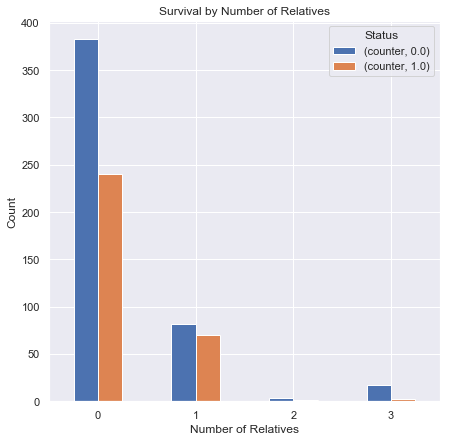

In [76]:
got_relatives_status.pivot_table(index='relatives', columns='status', aggfunc=sum).plot(kind='bar', figsize=(7,7)) #Nothing much in terms of a solid trend here since there's almost no data for relatives >= 2, but the relative survival chance for relatives = 3 is really low
plt.title('Survival by Number of Relatives')
plt.xlabel('Number of Relatives')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')

In [77]:
got_api_df = got_api_df.dropna() #Get ready...
got_api_df

,pageRank,status,age,relatives,bookMentions,gender
3,6.0,0.0,13,0,1,1
6,26.0,0.0,12,0,3,1
7,33.0,0.0,16,0,2,1
11,228.0,0.0,24,3,0,1
12,203.0,0.0,49,1,0,1
13,209.0,0.0,59,3,0,1
14,188.0,0.0,37,3,0,1
16,194.0,0.0,17,1,1,1
19,64.0,0.0,69,1,5,1
22,3.0,0.0,23,1,3,0


In [78]:
got_api_df.corr() #Oh snap!

,pageRank,status,age,relatives,bookMentions,gender
pageRank,1.000000,0.084728,0.159027,0.509753,0.311609,0.077413
status,0.084728,1.000000,-0.101806,-0.032789,0.231433,-0.315994
age,0.159027,-0.101806,1.000000,0.185120,0.083548,0.083652
relatives,0.509753,-0.032789,0.185120,1.000000,-0.064686,-0.001400
bookMentions,0.311609,0.231433,0.083548,-0.064686,1.000000,-0.048276
gender,0.077413,-0.315994,0.083652,-0.001400,-0.048276,1.000000


In [79]:
#got_api_df_normalized = (got_api_df - got_api_df.mean()) / got_api_df.std()
#got_api_df_normalized.head(20)

#got_api_df_normalized.corr()

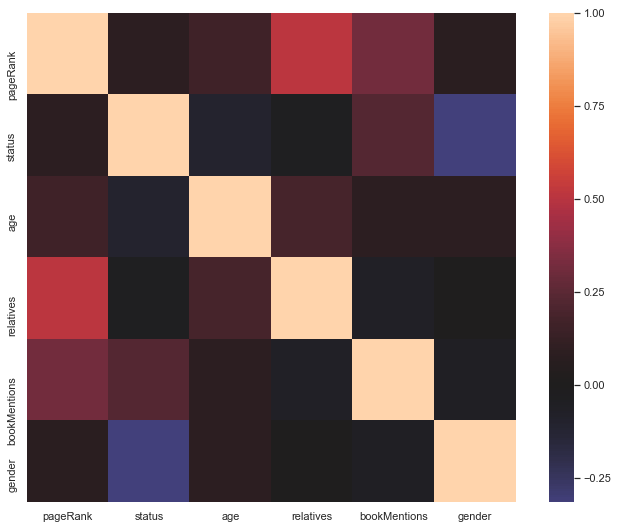

In [80]:
corrmat = got_api_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, center=0, square=True); #Seems like 'gender' and 'bookMentions' are the most correlated with 'status'. However, neither of their correlation scores are particularly strong... Perhaps what keeps people roped in this fantasy world is the fact that who gets to live or die is pretty hard to predict?   

In [81]:
#got_api_df.to_csv('got_api_df.csv')